In [1]:
import tensorflow as tf


In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(X_train, y_train) , (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /=255
X_test /=255

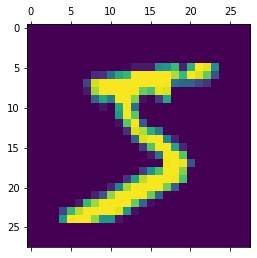

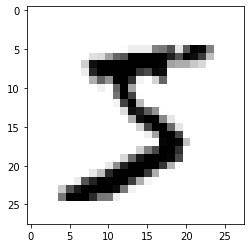

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.matshow(X_train[0])
plt.show()
plt.imshow(X_train[0], cmap = plt.cm.binary)

In [7]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

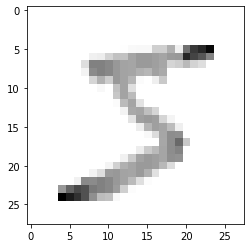

In [8]:
X_train = tf.keras.utils.normalize (X_train, axis = 1)
X_test = tf.keras.utils.normalize(X_test, axis=1)
plt.imshow(X_train[0], cmap = plt.cm.binary)

In [9]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [10]:
print(y_train[0])

5


In [11]:
import numpy as np
IMG_SIZE=28
X_trainr= np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE,1)
X_testr= np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE,1)
print("Training Samples dimension",X_trainr.shape)
print("Testing Samples dimension",X_testr.shape)

Training Samples dimension (60000, 28, 28, 1)
Testing Samples dimension (10000, 28, 28, 1)


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [13]:
model = Sequential()

model.add(Conv2D(64, (3,3), input_shape = X_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64, (3,3), input_shape = X_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64, (3,3), input_shape = X_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))



model.add (Flatten())
model.add (Dense(64))
model.add(Activation("relu"))


model.add (Dense(32))
model.add(Activation("relu"))

model.add (Dense(10))
model.add(Activation("softmax"))



In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          3

In [15]:
print ("Total Training Samples = ",len(X_trainr))

Total Training Samples =  60000


In [16]:
model.compile(loss ="sparse_categorical_crossentropy", optimizer = "adam", metrics=['accuracy'])

In [17]:
model.fit(X_trainr,y_train,epochs=5, validation_split = 0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/5
42000/42000 [==============================] - 85s 2ms/sample - loss: 0.3192 - accuracy: 0.8992 - val_loss: 0.1187 - val_accuracy: 0.9647
Epoch 2/5
42000/42000 [==============================] - 83s 2ms/sample - loss: 0.0983 - accuracy: 0.9701 - val_loss: 0.0795 - val_accuracy: 0.9754
Epoch 3/5
42000/42000 [==============================] - 85s 2ms/sample - loss: 0.0680 - accuracy: 0.9792 - val_loss: 0.0704 - val_accuracy: 0.9796
Epoch 4/5
42000/42000 [==============================] - 84s 2ms/sample - loss: 0.0548 - accuracy: 0.9827 - val_loss: 0.0571 - val_accuracy: 0.9818
Epoch 5/5
42000/42000 [==============================] - 83s 2ms/sample - loss: 0.0455 - accuracy: 0.9853 - val_loss: 0.0612 - val_accuracy: 0.9811


In [18]:
test_loss, test_acc = model.evaluate(X_testr, y_test)
print ("Test loss on 10,000 test samples",test_loss )
print ("Validation Accuracy on 10,000 test samples",test_acc )

10000/10000 [==============================] - 5s 473us/sample - loss: 0.0587 - accuracy: 0.9814
Test loss on 10,000 test samples 0.058716319087008015
Validation Accuracy on 10,000 test samples 0.9814


In [19]:
predicions = model.predict([X_testr])

In [20]:
print (predicions)

[[5.9724052e-06 1.6176068e-04 1.8981586e-03 ... 9.9571240e-01
  1.2889437e-05 2.7654942e-05]
 [1.1518408e-03 8.2388397e-05 9.9866784e-01 ... 3.5439978e-05
  1.3105848e-06 1.6988944e-08]
 [3.0583046e-06 9.9997437e-01 7.1613459e-07 ... 5.0883714e-06
  5.1899281e-08 9.1713355e-07]
 ...
 [1.3413788e-07 1.1777215e-05 1.5251243e-07 ... 6.3140419e-07
  1.7175119e-04 3.8574892e-04]
 [9.7901493e-06 2.4916274e-06 1.1151714e-09 ... 9.8301012e-09
  1.8806662e-03 1.9625513e-05]
 [4.0937004e-05 1.0924537e-07 4.8229691e-07 ... 1.0105288e-09
  1.5116273e-05 5.3319354e-07]]


In [21]:
print (np.argmax(predicions[0]))

7


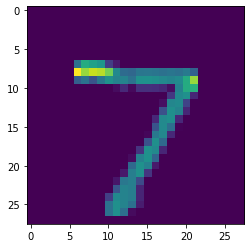

In [22]:
plt.imshow(X_test[0])

In [23]:
print (np.argmax(predicions[128]))

8


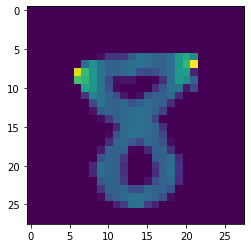

In [24]:
plt.imshow(X_test[128])

In [25]:
import os
import cv2 as cv
import cv2
from  matplotlib import pyplot as plt
%matplotlib inline
path = os.chdir(r'C:\Users\HP\OneDrive\Desktop\14\Images')

In [26]:

image = cv.imread('8.png', cv.IMREAD_GRAYSCALE)
image = cv.resize(image, (28,28))
image = image.astype('float32')
image = image.reshape(1,28,28,1,)
image /=255

In [27]:
model.predict(image).argmax()

8

In [28]:
image = cv2.imread("8.png")
cv2.imshow("8", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

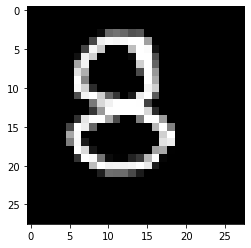

In [29]:
im = cv2.imread('8.png',1)
im2 = im[:,:,::-1] 
plt.imshow(im2)
plt.show()

In [31]:
path = r'C:\Users\HP\OneDrive\Desktop\14\Images\3.png'
img = cv2.imread(path)

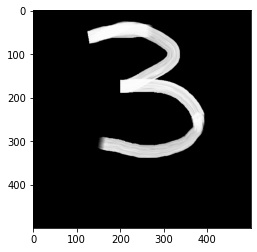

In [32]:
plt.imshow(img)

In [33]:
img.shape

(500, 500, 3)

In [34]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [35]:
gray.shape

(500, 500)

In [36]:
resized = cv2.resize(gray, (28,28),interpolation = cv2.INTER_AREA)

In [37]:
resized.shape


(28, 28)

In [38]:
newimg = tf.keras.utils.normalize (resized, axis = 1)

In [39]:
newimg = np.array(newimg).reshape(-1,IMG_SIZE, IMG_SIZE,1)

In [40]:
newimg.shape

(1, 28, 28, 1)

In [41]:
predicions = model.predict(newimg)

In [42]:
print (np.argmax(predicions))

3
